In [1]:
import cPickle as pickle


def PlotSeries(start, stop, text,labels, ylim=None):
    plt.figure(figsize=(10,7))
    models = ['base_2D',]+['mod_b_'+ str(i) for i in range(start, stop)]
    fits = []
    ll = []

    for galprop_tag in models:
            try:
                mod = pickle.load(open('../results/FitResult_'+ galprop_tag + '.pickle','rb'))
                fits.append(mod)

            except:
                print 'Error with model', galprop_tag
                pass

    plt.subplot(221)

    for i in range(len(models)):
        try:
            fit = fits[i]
            print 'log-like, TS:', models[i], np.sum(fit['loglike']), 2*(np.sum(fits[0]['loglike'])-np.sum(fit['loglike']))
            
            
            
            ll.append(2*(np.sum(fits[0]['loglike'])-np.sum(fit['loglike'])))
            
            E, flux, stat = fit['energies'], fit['DM']['flux'], fit['DM']['fluxunc']
            model = models[i].replace('_no_secondary','').replace('_','-')

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,(E**2*stat[:]/1e3,E**2*stat[:]/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            else:
                plt.errorbar(E/1e3,E**2*flux/1e3, 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

        except:
            pass


    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,2e-6)


    E, f0, stat0 = fits[0]['energies'], fits[0]['DM']['flux'], fits[0]['DM']['fluxunc']

    for i in range(0,len(models)):
        try:
            plt.subplot(222)
            fit = fits[i]
            E, flux, stat = fit['energies'], fit['DM']['flux'], fit['DM']['fluxunc']
            model = models[i].replace('_no_secondary','').replace('_','-')

            plt.errorbar(E/1e3,flux/f0, label=model,capthick=1, capsize=2, ls='-' )

            #plt.yscale('log')
            plt.xscale('log')
            plt.ylim(0,2)
            plt.ylabel(r'GCE Ratio')
            plt.xlabel(r'$\rm{E\ [GeV]}$')
            #plt.legend(frameon=False, fontsize=8)

            plt.subplot(223)


            TS = -2*(np.array(fit['loglike'])-np.array(fits[0]['loglike']))
            plt.plot(E/1e3, TS)
            plt.ylabel('TS')
            #print "TS:", TS
            plt.xlabel(r'$\rm{E\ [GeV]}$')
            plt.xscale('log')
            plt.ylim(-400,50)
            
        except:
            pass
    plt.subplot(223)
    plt.text(10,-350,text)
    
    for i in range(0,len(models)):
        try:
            plt.subplot(224)
            plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick')
            # You can specify a rotation for the tick labels in degrees or with keywords.
            plt.xticks(range(len(labels)), labels, rotation='vertical')
            plt.xlim(-.5, len(labels)-.5)
            if ylim is not None:
                plt.ylim(ylim)
            plt.ylabel(r'$-2\ln{(\mathcal{L})}$')            
        except:
            pass
    
    
    

#plt.errorbar(E/1e3,np.ones(len(E)),yerr=(np.abs(stat0[:,0])/f0,stat0[:,1]/f0), linestyle='')

# plt.xscale('log')
# plt.ylabel(r'$\rm{Ratio\ of\ GCE\ 3FGL/2FGL}$')
# plt.xlabel(r'$\rm{E\ [GeV]}$')

# plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/GCE_3fgl_vs_2fgl.pdf')

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_0 -1185245.43181 -2974.84397659
log-like, TS: mod_b_1 -1185776.92761 -1911.85237577
log-like, TS: mod_b_2 -1186094.92056 -1275.86647633
log-like, TS: mod_b_3 -1186211.72971 -1042.24817201
log-like, TS: mod_b_4 -1186162.9289 -1139.84979578
log-like, TS: mod_b_5 -1185936.03581 -1593.63597409
log-like, TS: mod_b_6 -1185728.71661 -2008.27436542
log-like, TS: mod_b_7 -1185709.90771 -2045.89216984
log-like, TS: mod_b_8 -1185722.25696 -2021.19366869
log-like, TS: mod_b_9 -1185744.26386 -1977.17986167
log-like, TS: mod_b_10 -1174381.79807 -24702.1114465


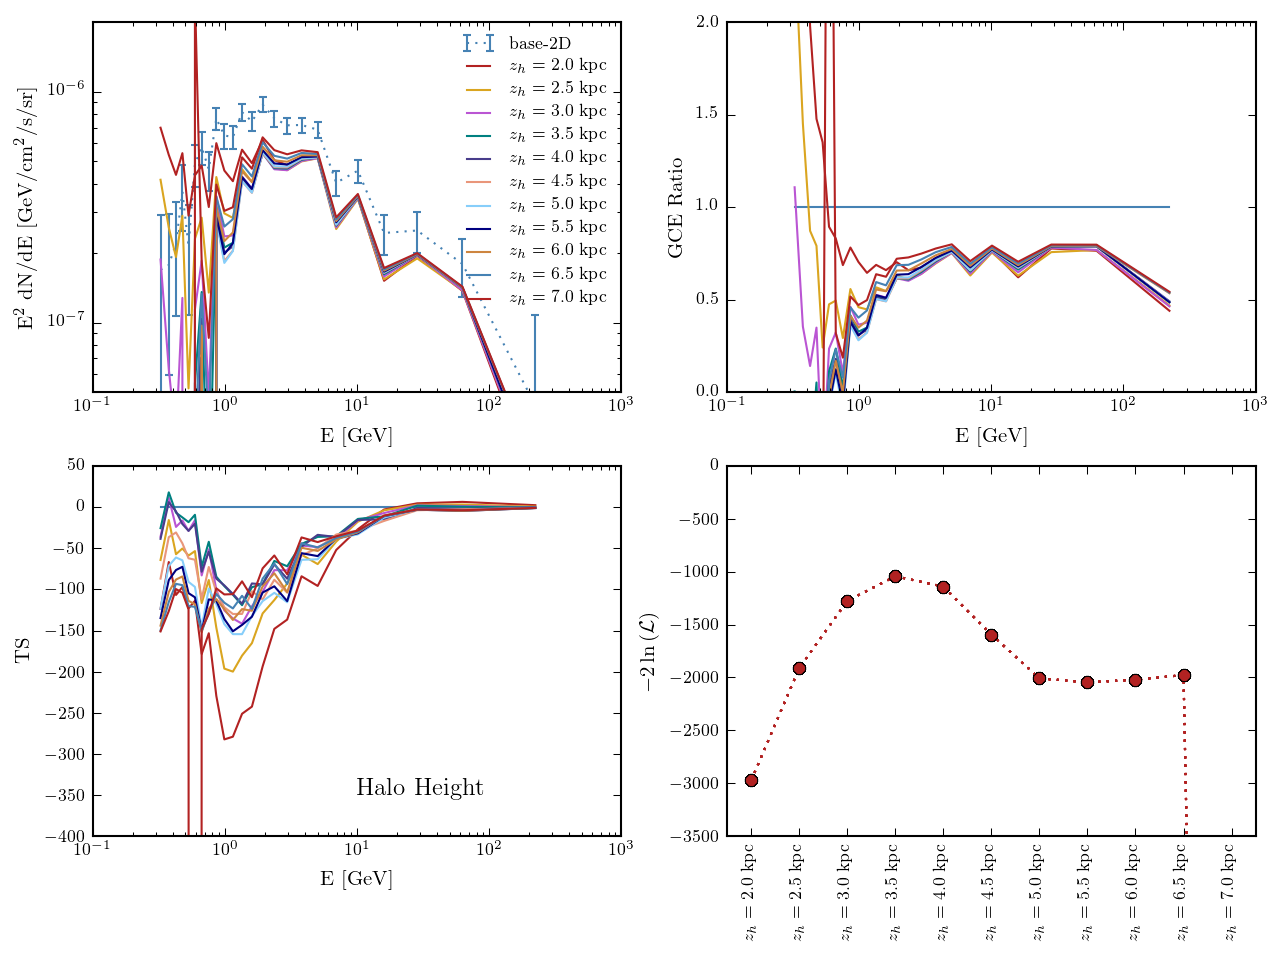

In [2]:
PlotSeries(start=0, stop=11, text='Halo Height', labels=[r'$z_h='+str(i)+'$ kpc' for i in np.linspace(2,7,11)], ylim=(-3500,0))

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_11 -1185588.46569 -2288.77619996
log-like, TS: mod_b_12 -1186367.42772 -730.85214704
log-like, TS: mod_b_13 -1185816.67788 -1832.3518221
log-like, TS: mod_b_14 -1186162.9289 -1139.84979578


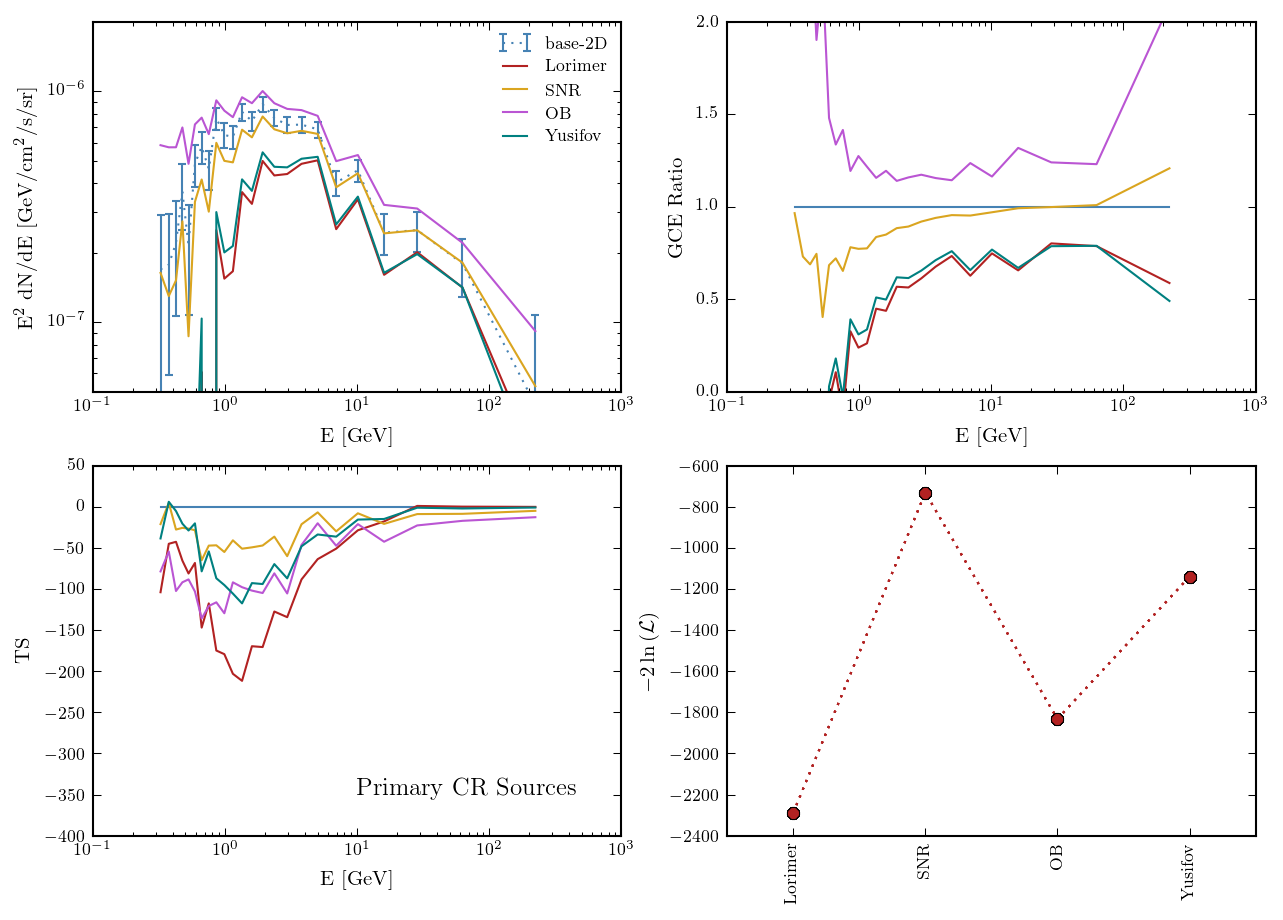

In [3]:
PlotSeries(start=11, stop=15, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'))

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_15 -1185525.98553 -2413.73653112
log-like, TS: mod_b_16 -1184547.60205 -4370.50348112
log-like, TS: mod_b_17 -1186162.9289 -1139.84979578
log-like, TS: mod_b_18 -1185114.71927 -3236.2690532


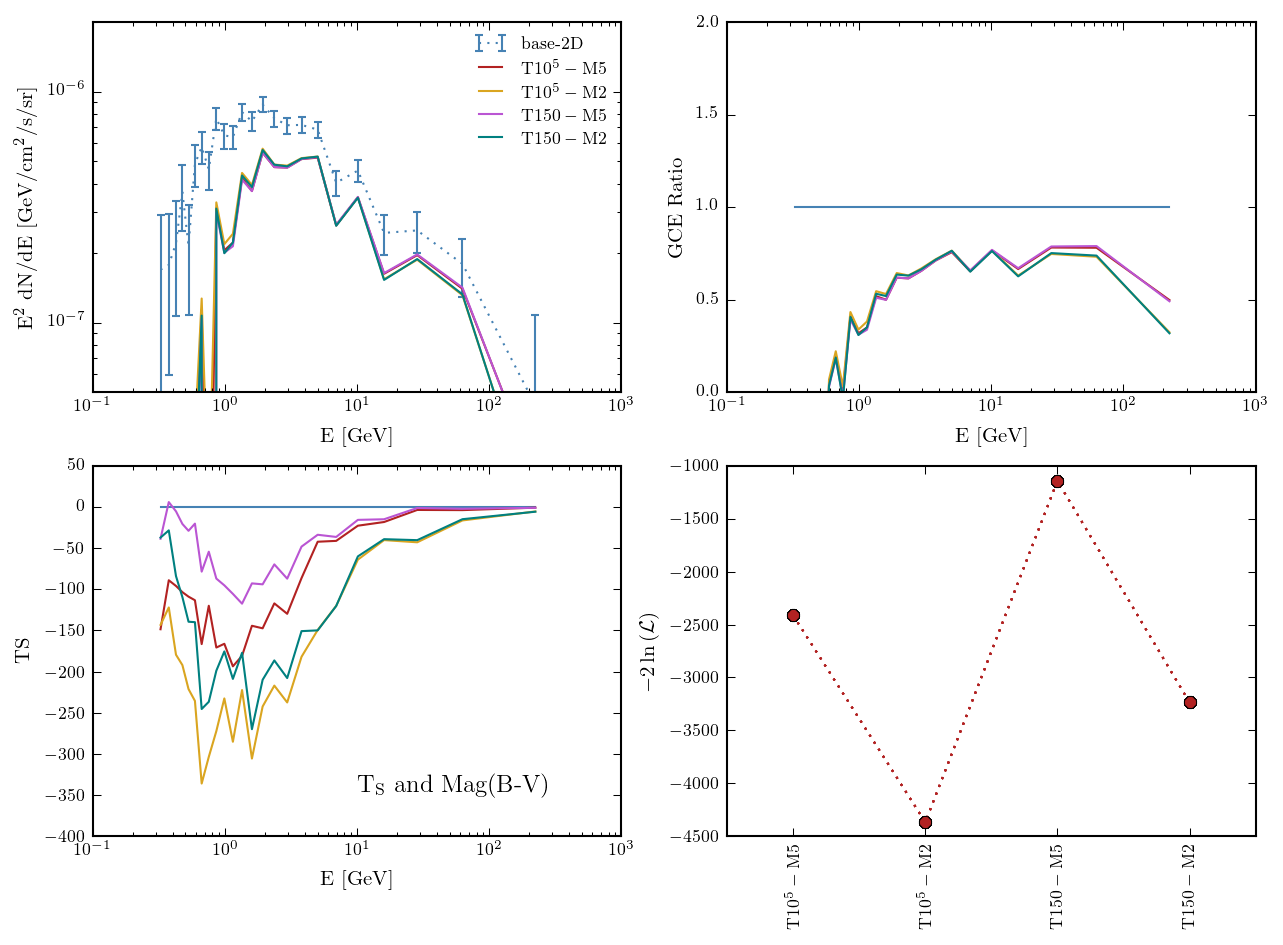

In [4]:
PlotSeries(start=15, stop=19, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'))

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_19 -450426.042606 -1472613.62238
log-like, TS: mod_b_20 1654710.50933 -5682886.72624
log-like, TS: mod_b_21 26999.6273505 -2427464.96229
log-like, TS: mod_b_22 -1159566.24749 -54333.2126004
log-like, TS: mod_b_23 -1186163.03613 -1139.63532754
log-like, TS: mod_b_24 -1186095.19324 -1275.32111027
log-like, TS: mod_b_25 -1186080.31792 -1305.07174141
log-like, TS: mod_b_26 -1186076.89526 -1311.91707723


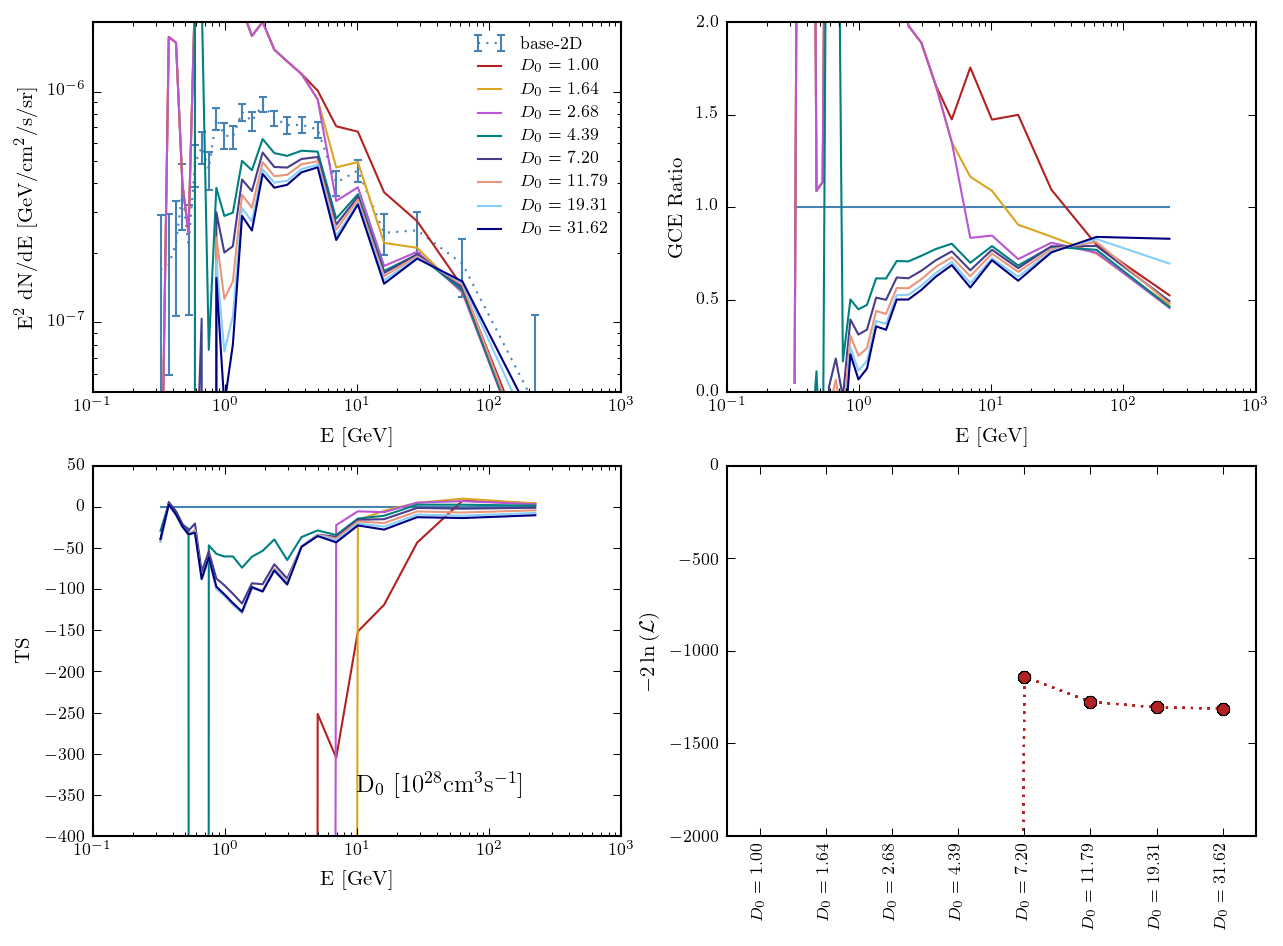

In [5]:
PlotSeries(start=19, stop=27, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,29.5,8)/1e28], ylim=(-2000))

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_27 -1186017.68066 -1430.34627082
log-like, TS: mod_b_28 -1186027.93341 -1409.84077945
log-like, TS: mod_b_29 -1186063.64302 -1338.42155099
log-like, TS: mod_b_30 -1186136.92178 -1191.86403434
log-like, TS: mod_b_31 -1186236.52543 -992.656736093
log-like, TS: mod_b_32 -1174654.24512 -24157.2173534


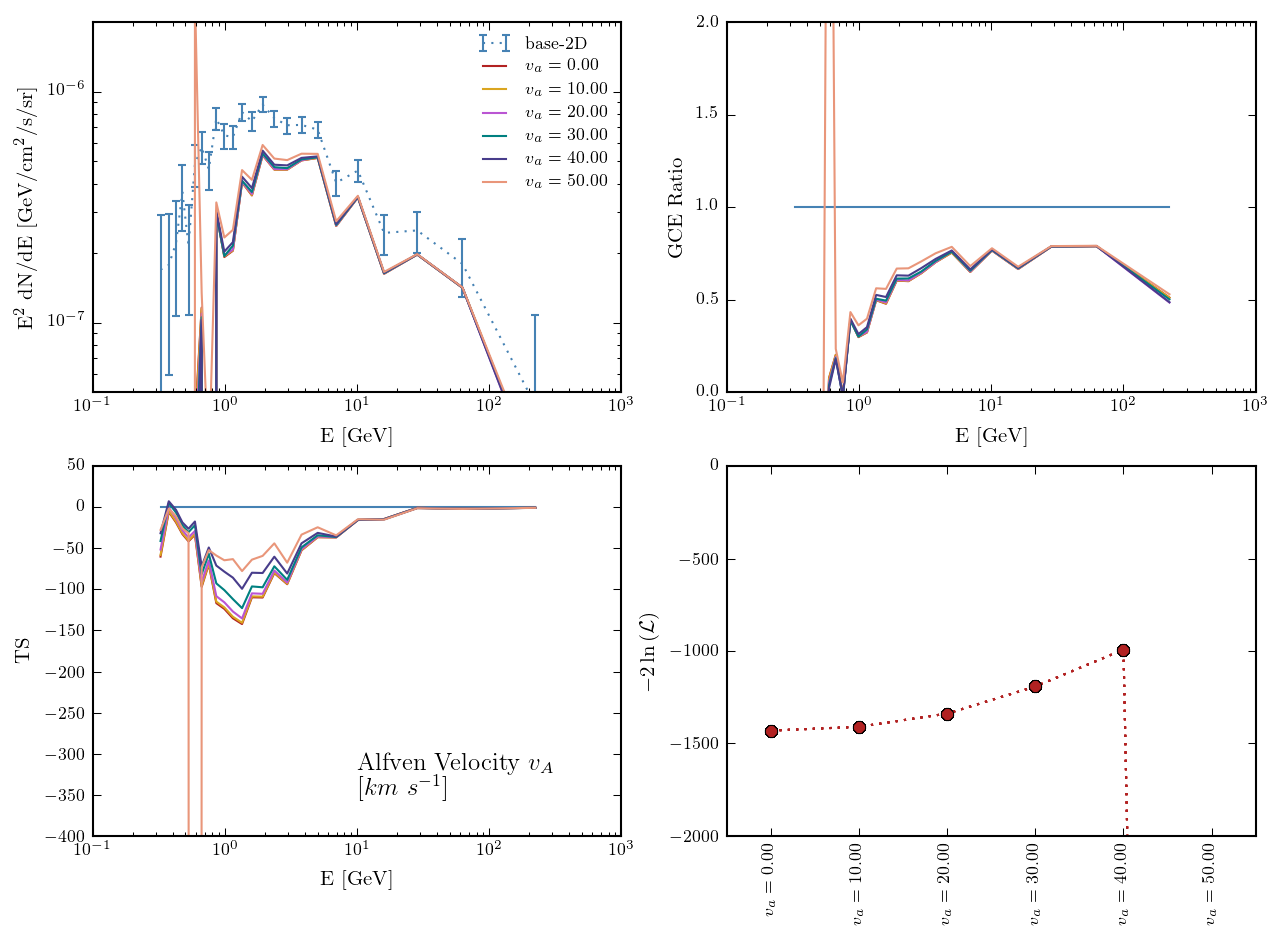

In [6]:
PlotSeries(start=27, stop=33, text=r'\noindent Alfven Velocity $v_A $\newline $[km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(0,50,6)], ylim=(-2000,0))

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_33 -1186162.9289 -1139.84979578
log-like, TS: mod_b_34 -1185601.36541 -2262.97677753
log-like, TS: mod_b_35 -1185288.49057 -2888.72644664
log-like, TS: mod_b_36 -1185060.75121 -3344.20516099
log-like, TS: mod_b_37 -1184885.00016 -3695.70727101
log-like, TS: mod_b_38 -1184743.30298 -3979.10163659


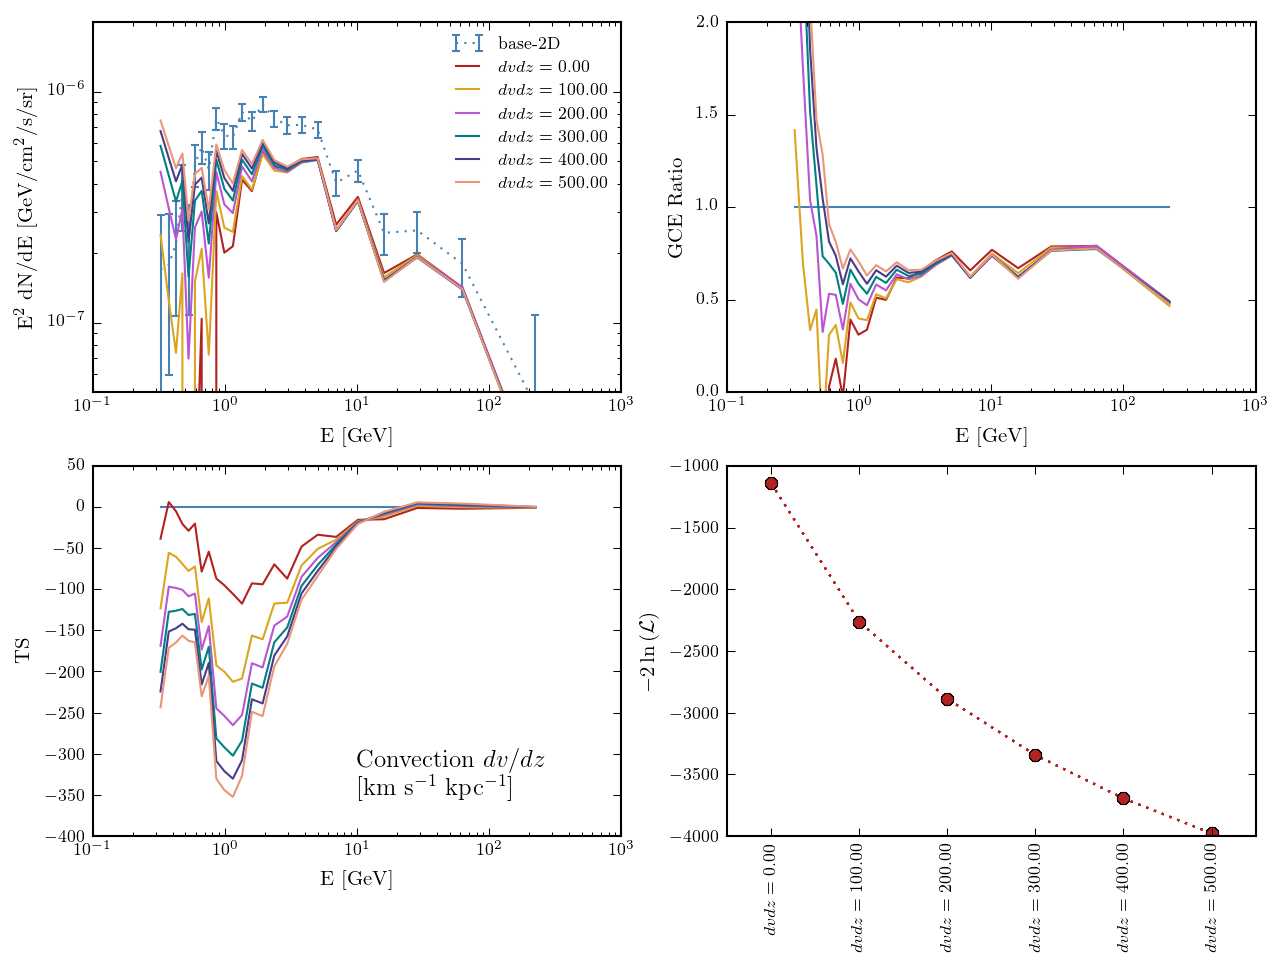

In [7]:
PlotSeries(start=33, stop=39, text=r'\noindent Convection $dv/dz$\newline $\rm [km\ s^{-1}\ kpc^{-1}]$', labels=['$dvdz=%2.2f' % v + '$' for v in np.linspace(0,500,6)])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_39 -1186158.13644 -1149.43470905
log-like, TS: mod_b_40 -1186158.52683 -1148.65392162
log-like, TS: mod_b_41 -1186160.5982 -1144.51119524
log-like, TS: mod_b_42 -1186166.08296 -1133.54166165
log-like, TS: mod_b_43 -1186123.09999 -1219.50760691
log-like, TS: mod_b_44 -1185671.05311 -2123.60136932
log-like, TS: mod_b_45 -1184557.16992 -4351.36774346
log-like, TS: mod_b_46 -1183816.9133 -5831.88098703


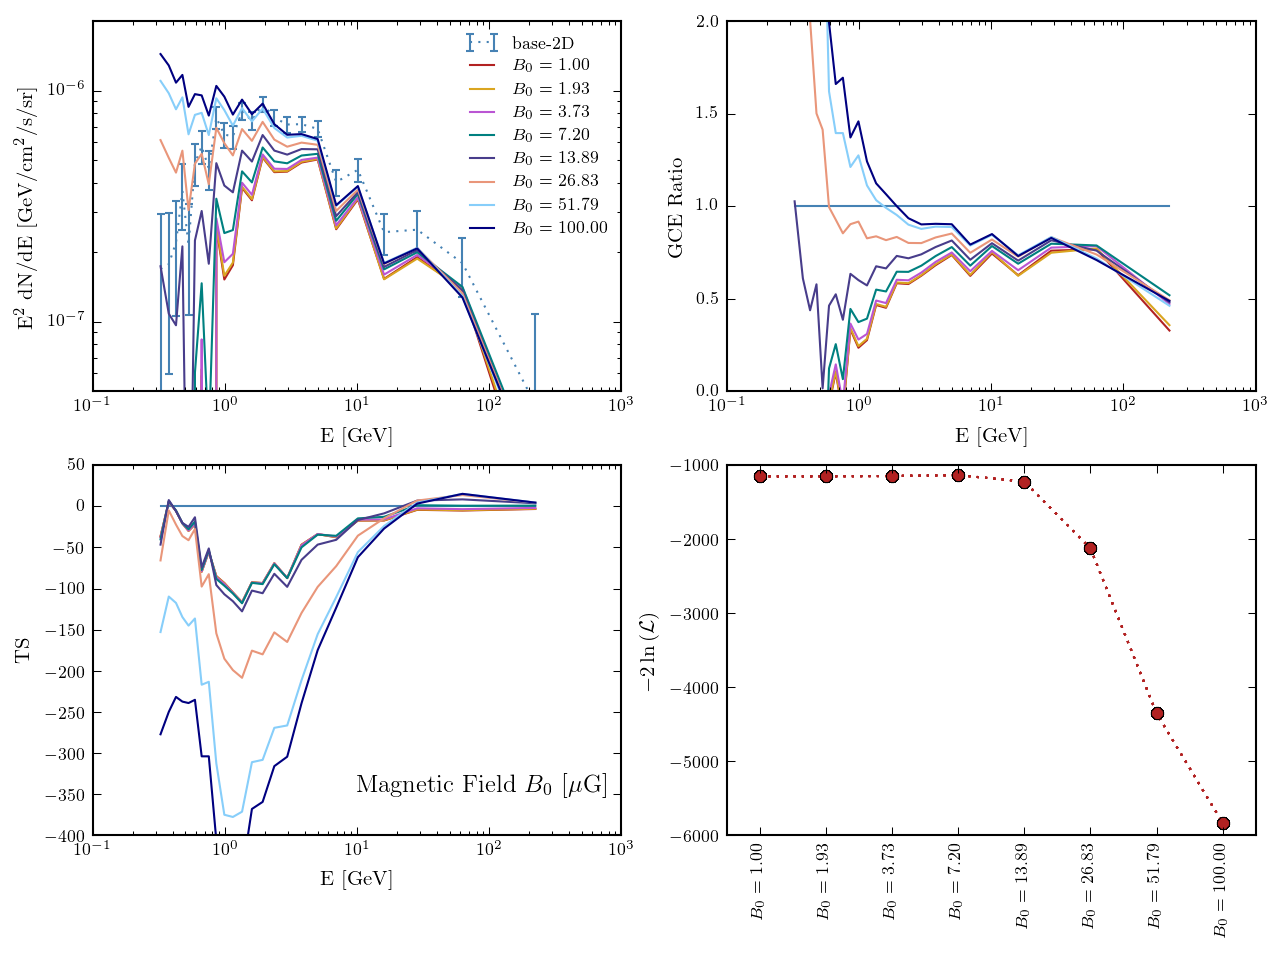

In [8]:
PlotSeries(start=39, stop=47, text=r'\noindent Magnetic Field $B_0\ \rm{[\mu G]}$', labels=['$B_0=%2.2f' % v + '$' for v in np.logspace(0,2,8)])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_47 -1186183.2627 -1099.18219469
log-like, TS: mod_b_48 -1186179.39067 -1106.92625629
log-like, TS: mod_b_49 -1186173.92511 -1117.85736382
log-like, TS: mod_b_50 -1186169.28569 -1127.13621388
log-like, TS: mod_b_51 -1186165.67726 -1134.35307145
log-like, TS: mod_b_52 -1186162.9289 -1139.84979578


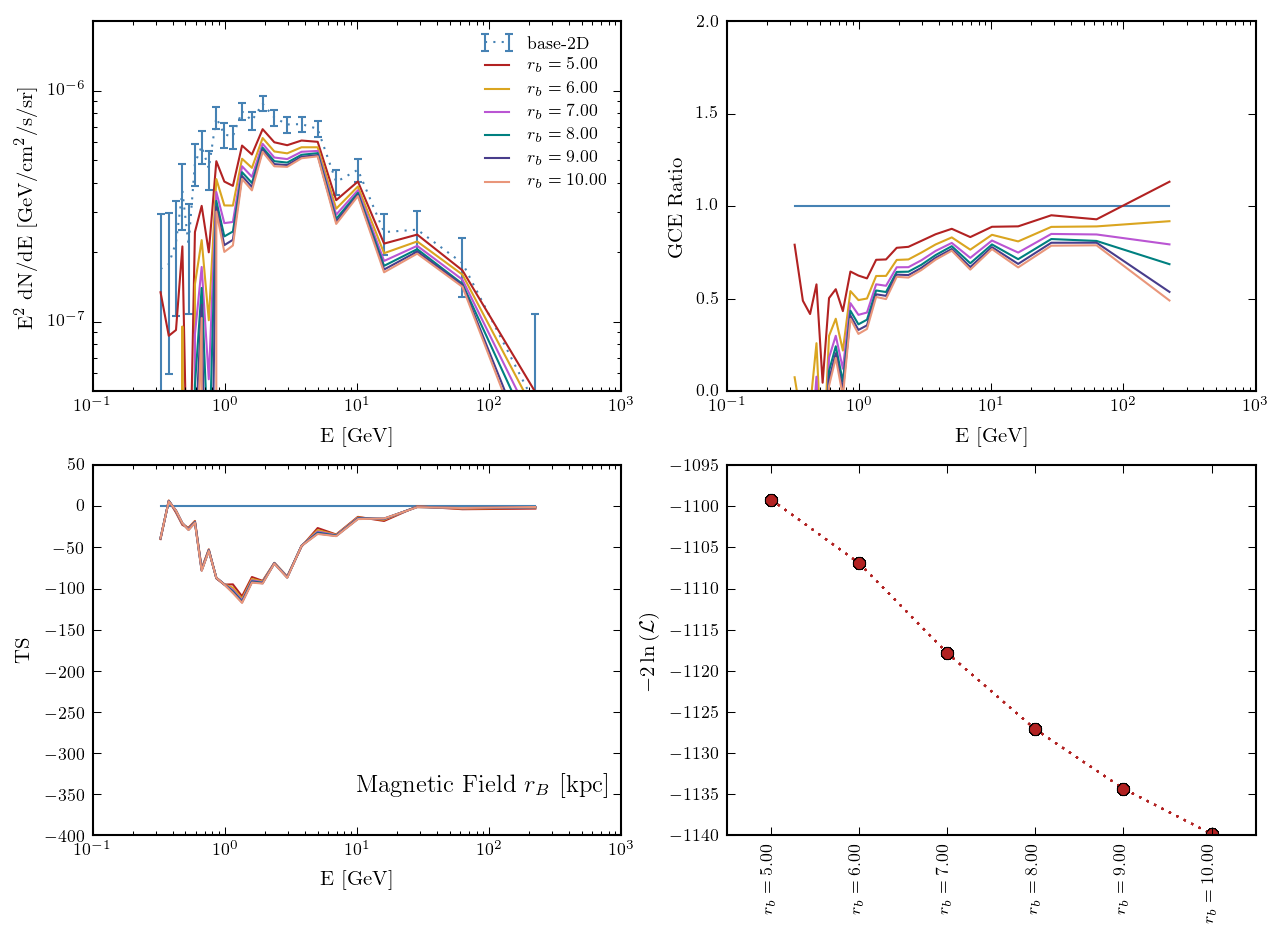

In [9]:
PlotSeries(start=47, stop=53, text=r'\noindent Magnetic Field $r_B$ $\rm [kpc]$', labels=['$r_b=%2.2f' % v + '$' for v in np.linspace(5,10,6)])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_53 -1186170.07782 -1125.55194977
log-like, TS: mod_b_54 -1186167.26932 -1131.16894075
log-like, TS: mod_b_55 -1186160.41738 -1144.87282681
log-like, TS: mod_b_56 -1186152.43223 -1160.84313732
log-like, TS: mod_b_57 -1186144.65195 -1176.40369015
log-like, TS: mod_b_58 -1186137.49038 -1190.72682633


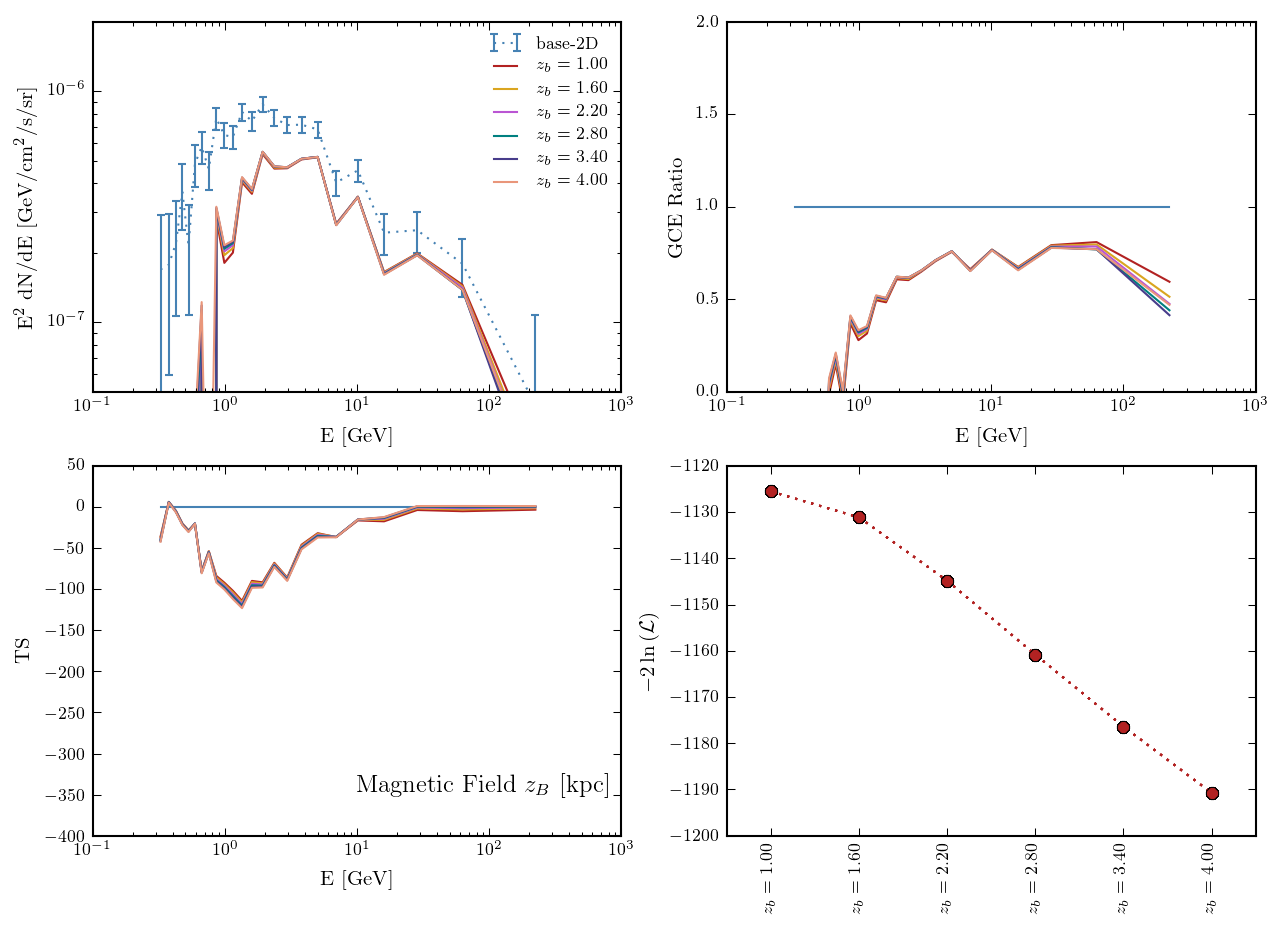

In [10]:
PlotSeries(start=53, stop=59, text=r'\noindent Magnetic Field $z_B$ $\rm [kpc]$', labels=['$z_b=%2.2f' % v + '$' for v in np.linspace(1,4,6)])

log-like, TS: base_2D -1186732.85379 0.0
log-like, TS: mod_b_59 -1186162.9289 -1139.84979578
log-like, TS: mod_b_60 -1186162.9289 -1139.84979578
log-like, TS: mod_b_61 -1186162.9289 -1139.84979578
log-like, TS: mod_b_62 -1186162.9289 -1139.84979578
log-like, TS: mod_b_63 -1186162.9289 -1139.84979578
log-like, TS: mod_b_64 -1186162.9289 -1139.84979578


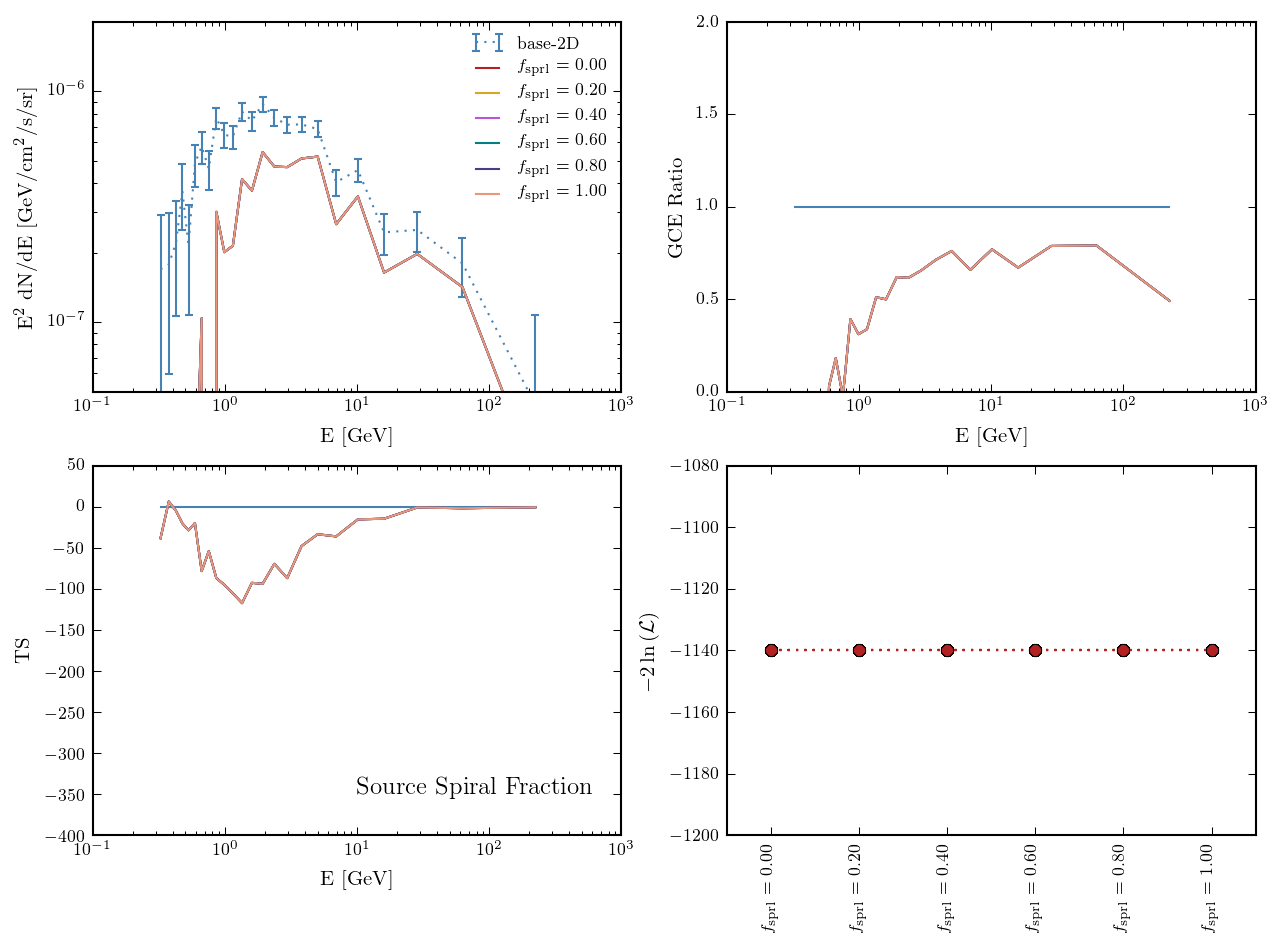

In [11]:
PlotSeries(start=59, stop=65, text=r'\noindent Source Spiral Fraction$', labels=[r'$f_{\rm sprl}=%2.2f' % v + '$' for v in np.linspace(0,1,6)])

In [12]:
np.linspace(2,7,11)

array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ])

In [13]:
import seaborn as sns
import matplotlib
plt.rcParams['axes.color_cycle'] = matplotlib.colors.ColorConverter.to_rgb(sns.color_palette("Set2", 10))



TypeError: unbound method to_rgb() must be called with ColorConverter instance as first argument (got _ColorPalette instance instead)